In [12]:
import os
import requests
import pandas as pd

In [7]:
url2='https://www.indexmundi.com/map/?t=0&v=26&r=xx&l=en'
html2=requests.get(url2).content
Death_rate=pd.read_html(html2)

In [8]:
Death_rate[1]

,Country,"Death rate (deaths/1,000 population)",Year
0,Lesotho,15,2018
1,Lithuania,15,2018
2,Latvia,15,2018
3,Bulgaria,15,2018
4,Ukraine,14,2018
...,...,...,...
192,Saudi Arabia,3,2018
193,Bahrain,3,2018
194,Kuwait,2,2018
195,United Arab Emirates,2,2018


In [20]:
#ya descargados los archivos se leerán 
deatho = pd.read_csv('death_rate.csv')
birtho = pd.read_csv('birth_rate.csv')

In [21]:
deatho.head()

,Country,"Death rate (deaths/1,000 population)",Year
0,Tuvalu,8,2018
1,Palau,8,2018
2,New Zealand,8,2018
3,Australia,7,2018
4,Kiribati,7,2018


In [22]:
birtho.head()

,Country,"Birth rate (births/1,000 population)",Year
0,Solomon Islands,25,2018
1,Tuvalu,24,2018
2,Vanuatu,24,2018
3,Papua New Guinea,23,2018
4,Nauru,23,2018


In [24]:
muerte=deatho.pivot_table('Death rate (deaths/1,000 population)', index='Country')
nacimiento=birtho.pivot_table('Birth rate (births/1,000 population)', index='Country')

In [27]:
union = pd.merge(muerte, nacimiento, how='outer',
                  left_on='Country', right_on='Country')
#merged = merged.drop('Edo', 1) # drop duplicate info
union.head()

,"Death rate (deaths/1,000 population)","Birth rate (births/1,000 population)"
Country,,
Australia,7,12
Fiji,6,18
Kiribati,7,21
Nauru,6,23
New Caledonia,6,15


C:\Users\fdm30\miniconda3\envs\ambienteprueba\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


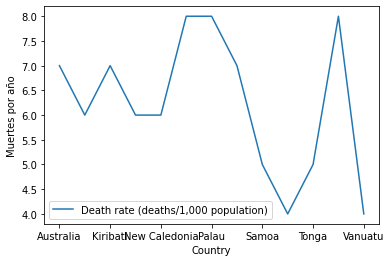

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
#sns.set()  # use Seaborn styles
union.pivot_table('Death rate (deaths/1,000 population)', index='Country').plot()
plt.ylabel('Muertes por año');

C:\Users\fdm30\miniconda3\envs\ambienteprueba\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


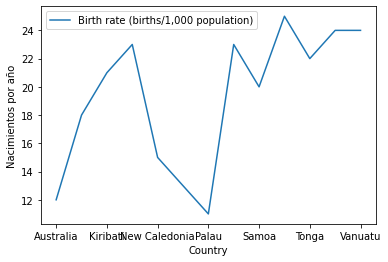

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
#sns.set()  # use Seaborn styles
union.pivot_table('Birth rate (births/1,000 population)', index='Country').plot()
plt.ylabel('Nacimientos por año');